In [28]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
sns.set_style('white')
np.random.seed(42)

In [29]:
idx = pd.IndexSlice
with pd.HDFStore('data/assets.h5') as store:
    returns = (store['quandl/wiki/prices'].loc[idx['2000':'2018', :], 'adj_close'].unstack('ticker')
#                .resample('W')
#                .last()
               .pct_change())

# PCA is sensitive to outliers and doesn't allow missing data.
returns = returns.dropna(thresh=int(returns.shape[0] * .95), axis=1)
returns = returns.dropna(thresh=int(returns.shape[1] * .95)).clip(lower=-.5, upper=.5)
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4705 entries, 2000-01-04 to 2018-03-27
Columns: 1886 entries, A to ZQK
dtypes: float64(1886)
memory usage: 67.7 MB


In [30]:
returns = returns.sample(n=250)
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))
pca = PCA(n_components=2)

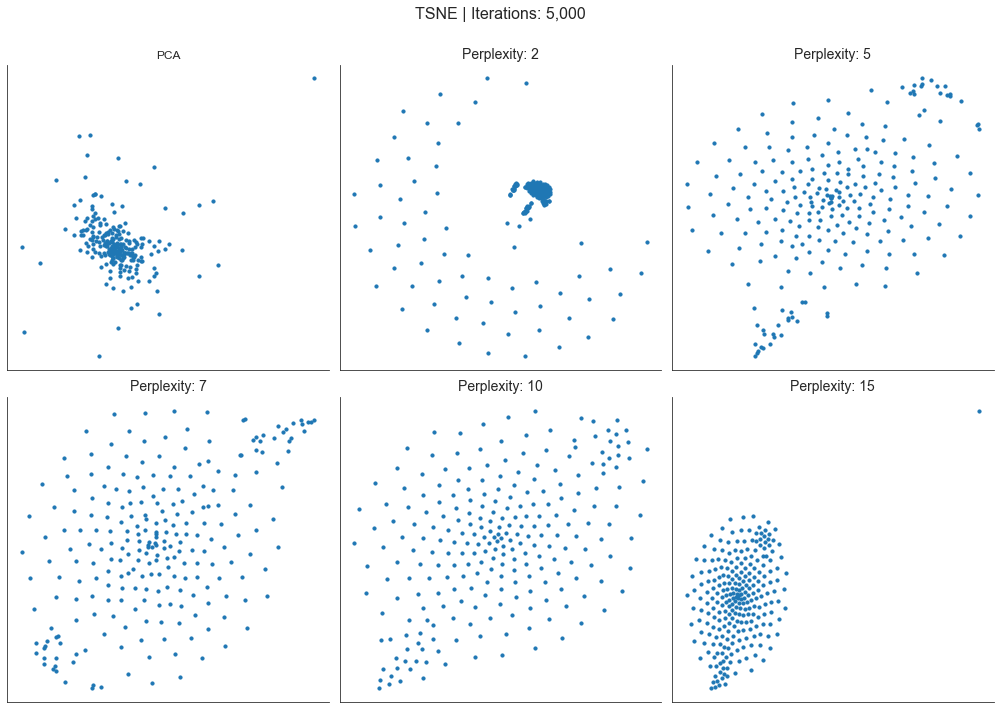

In [31]:
# T-Stochastic Neighbor Embedding (TSNE)
n_iter = 5000
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, p in enumerate([2, 5, 7, 10, 15], 1):
    embedding = TSNE(perplexity=p, n_iter=n_iter).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Perplexity: {:.0f}'.format(p), fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)0
    axes[i].axes.get_yaxis().set_visible(False)

fig.suptitle(f'TSNE | Iterations: {n_iter:,.0f}', fontsize=16)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

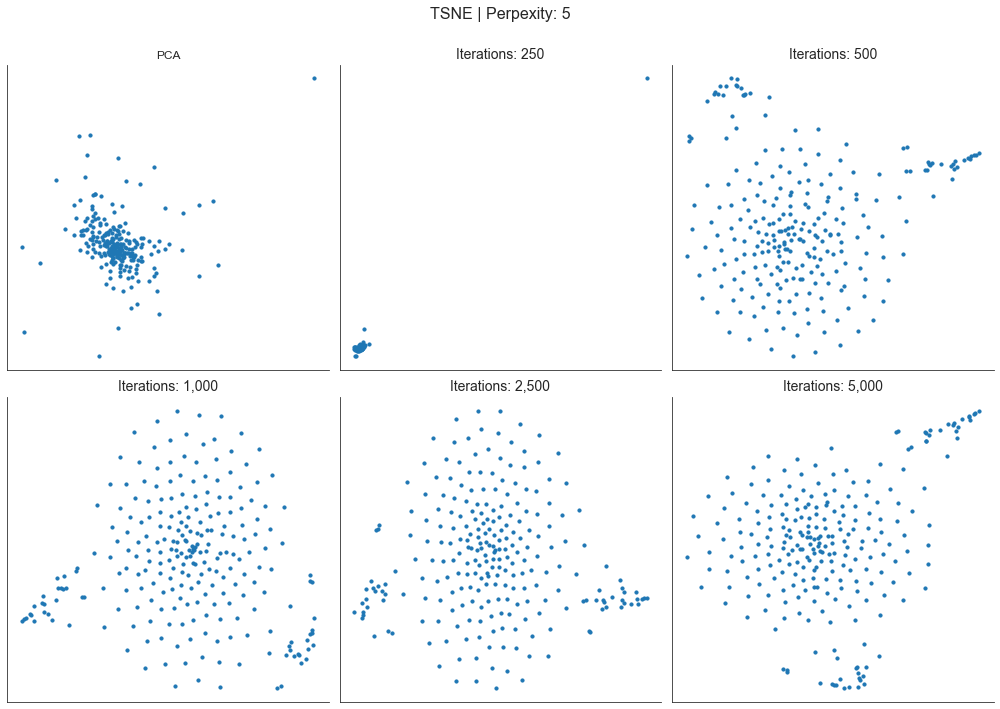

In [32]:
# Convergence with n_iter
perplexity = 5
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes = axes.flatten()
axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, n in enumerate([250, 500, 1000, 2500, 5000], 1):
    embedding = TSNE(perplexity=perplexity, n_iter=n).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Iterations: {:,.0f}'.format(n), fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

fig.suptitle(f'TSNE | Perpexity: {perplexity:,.0f}', fontsize=16)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

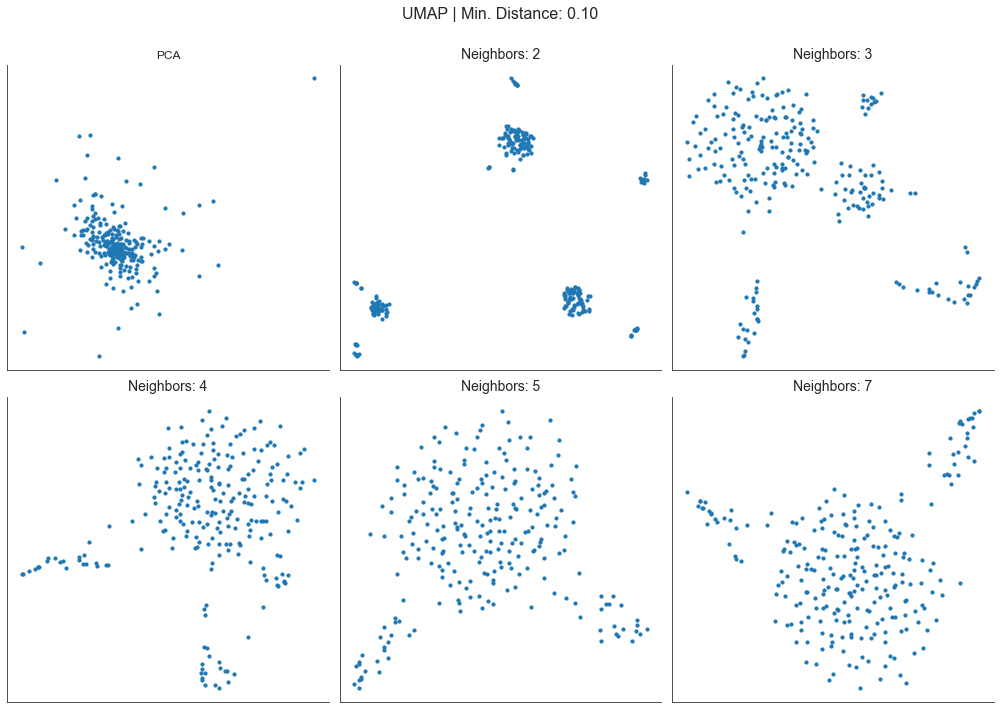

In [33]:
# Uniform Manifold Approximation and Projection (UMAP) - most accurate & fast
# 1) UMAP with changing n_neighbors
min_dist = .1
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, n in enumerate([2, 3, 4, 5, 7], 1):
    # n_neighbors: # of nearest neighbor
    # min_dist: minimum distance btw points on the low dimension space
    embedding = umap.UMAP(n_neighbors=n, min_dist=min_dist).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Neighbors: {:.0f}'.format(n), fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

fig.suptitle(f'UMAP | Min. Distance: {min_dist:,.2f}', fontsize=16)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

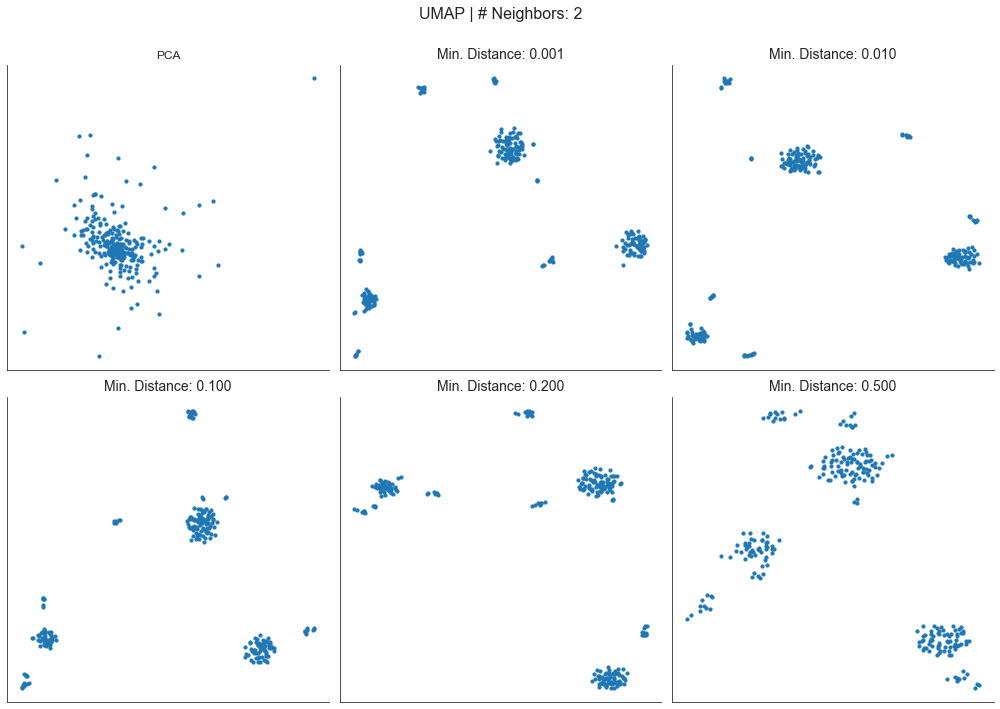

In [34]:
# 2) UMAP with changing n_neighbors
# Minimum Distance
n_neighbors = 2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes = axes.flatten()

axes[0].scatter(*pca.fit_transform(returns).T, s=10)
axes[0].set_title('PCA')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, d in enumerate([.001, .01, .1, .2, .5], 1):
    embedding = umap.UMAP(n_neighbors=n_neighbors, min_dist=d).fit_transform(returns)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10)
    axes[i].set_title('Min. Distance: {:.3f}'.format(d), fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)


fig.suptitle(f'UMAP | # Neighbors: {n_neighbors:,.0f}', fontsize=16)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)